In [2]:
import os
import cv2
import numpy as np
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
# from custom_functions.yolo_data import rescale

In [2]:
root = Path("../TRAIN_DATA/Letters/train")

In [3]:
image_paths = glob(os.path.join(root, "images/*"))
label_paths = [str(i).replace("images", "labels").replace("jpeg", "txt") for i in image_paths]

In [3]:
import numpy as np
import cv2

def load_yolo_labels(label_path, img_shape):
    """
    Load YOLO labels from a file and convert them to pixel coordinates.

    Inputs:
        - `label_path`: Path to the label file | type: str
        - `img_shape`: Shape of the image (height, width) | type: tuple
    Output(s):
        - List of labels in pixel coordinates | type: list
    """
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    for i in range(len(lines)):
        # Convert string to numpy array and reshape
        lines[i] = np.array([float(j) for j in lines[i].replace("\n","").split()[1:]]).reshape((-1,2))
        # Convert normalized coordinates to pixel coordinates
        lines[i][:, 0] *= img_shape[1]
        lines[i][:, 1] *= img_shape[0]
        # Convert to integer
        lines[i] = lines[i].astype(np.int32)
    return lines


def draw_polygon(img, polygon, fill_color=(200, 0, 0), outline_color=(200, 200, 200)):
    """
    Draw a polygon on an image.

    Inputs:
        - `img`: Image to draw the polygon on | type: numpy.ndarray
        - `polygon`: Coordinates of the polygon vertices | type: numpy.ndarray
        - `fill_color`: Color to fill the polygon with (BGR) | type: tuple
        - `outline_color`: Color of the polygon outline (BGR) | type: tuple
    Output(s):
        - Image with the polygon drawn on it | type: numpy.ndarray
    """
    # Create overlay and outlines images
    overlay = np.zeros_like(img)
    outlines = np.zeros_like(img)
    
    # Draw filled polygon on overlay image
    cv2.fillPoly(overlay, [polygon], fill_color)
    
    # Draw polygon outline on outlines image
    cv2.polylines(outlines, [polygon], True, outline_color, 1)

    # Add overlay and outlines to the original image
    img = cv2.addWeighted(img, 1, overlay, 0.5, 0)
    img = cv2.addWeighted(img, 1, outlines, 1, 0)
        
    return img

0 1
0 2
0 3


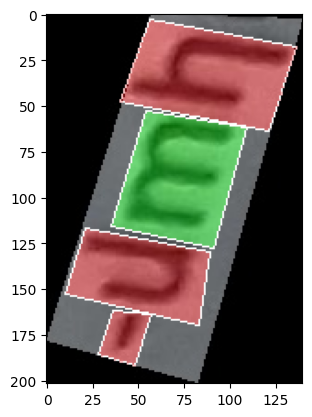

1 0
1 2
1 3


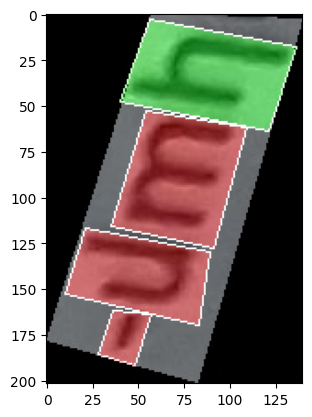

2 0
2 1
2 3


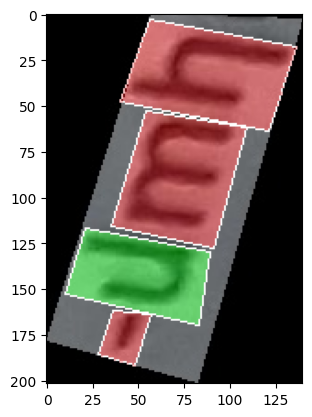

3 0
3 1
3 2


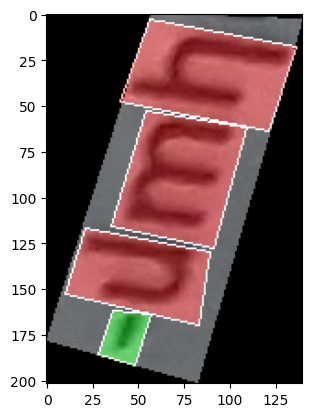

0 1
0 2
0 3


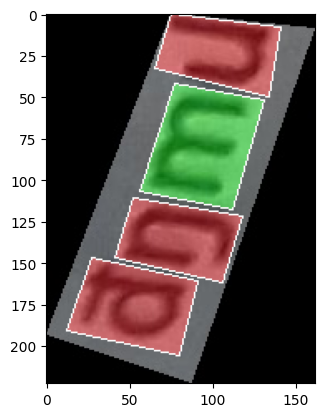

1 0
1 2
1 3


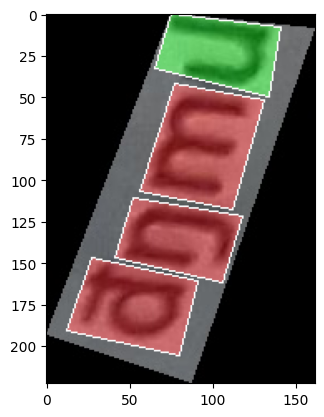

2 0
2 1
2 3


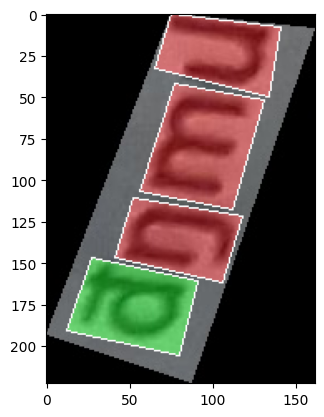

3 0
3 1
3 2


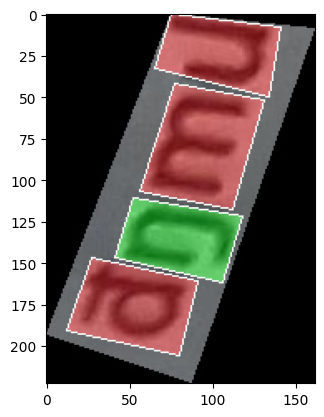

0 1
0 2


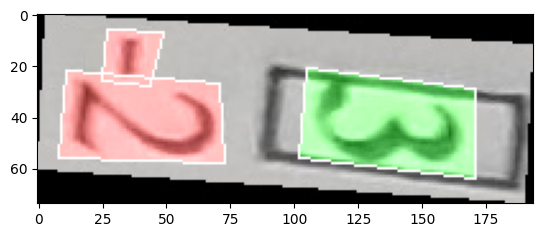

1 0
1 2


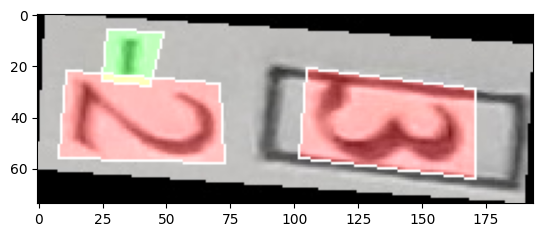

2 0
2 1


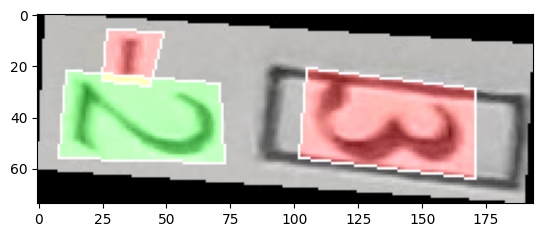

0 1
0 2


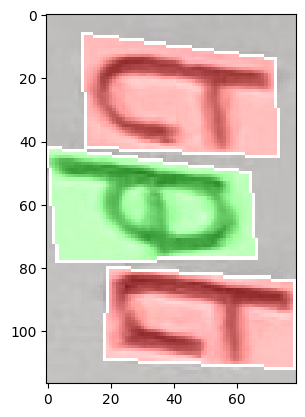

1 0
1 2


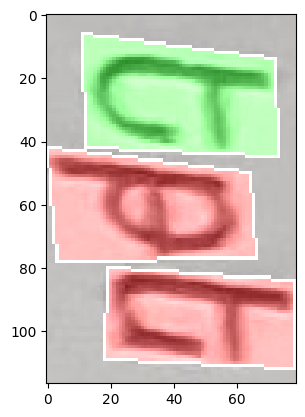

2 0
2 1


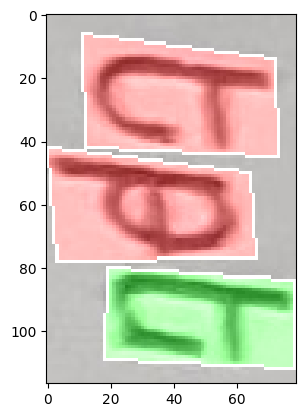

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


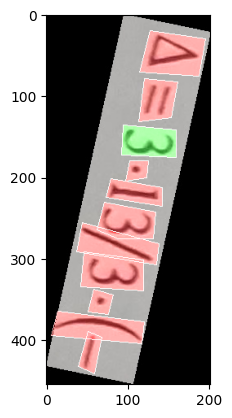

1 0
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10


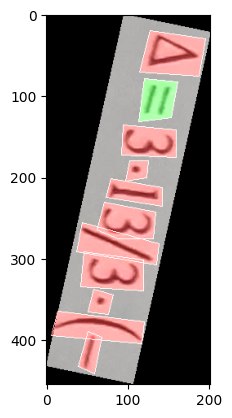

2 0
2 1
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10


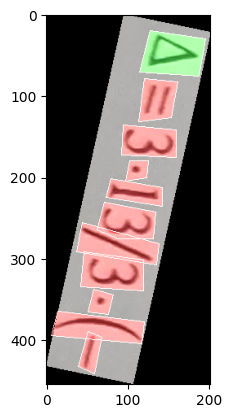

3 0
3 1
3 2
3 4
3 5
3 6
3 7
3 8
3 9
3 10


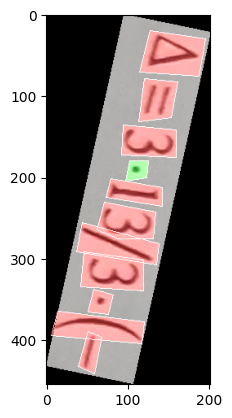

4 0
4 1
4 2
4 3
4 5
4 6
4 7
4 8
4 9
4 10


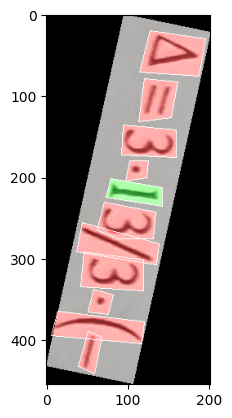

5 0
5 1
5 2
5 3
5 4
5 6
5 7
5 8
5 9
5 10


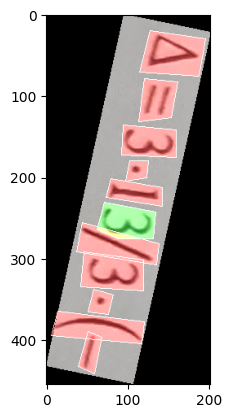

6 0
6 1
6 2
6 3
6 4
6 5
6 7
6 8
6 9
6 10


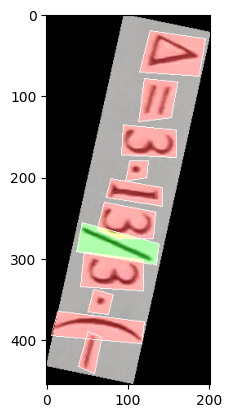

7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 8
7 9
7 10


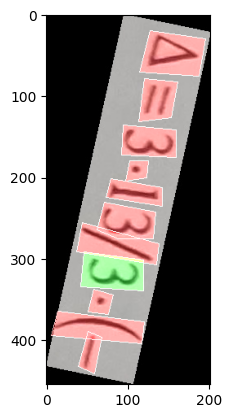

8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 9
8 10


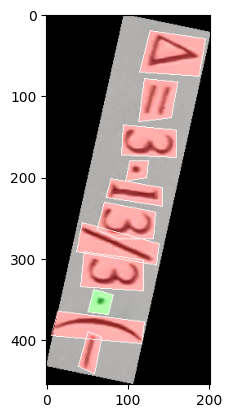

9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 10


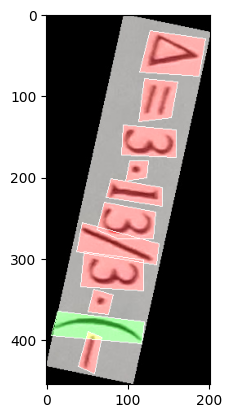

10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9


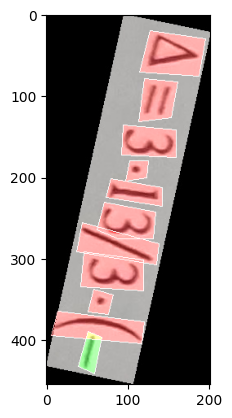

0 1
0 2
0 3
0 4
0 5
0 6
0 7


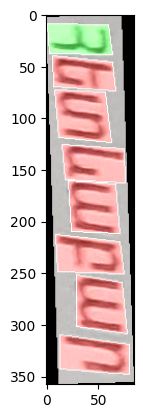

1 0
1 2
1 3
1 4
1 5
1 6
1 7


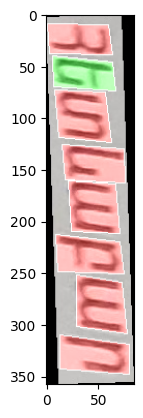

2 0
2 1
2 3
2 4
2 5
2 6
2 7


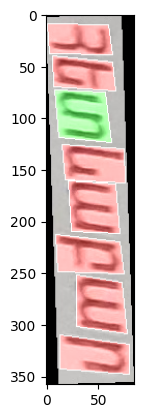

3 0
3 1
3 2
3 4
3 5
3 6
3 7


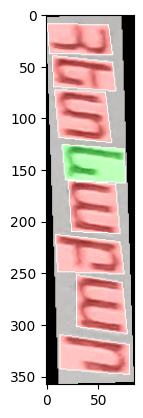

4 0
4 1
4 2
4 3
4 5
4 6
4 7


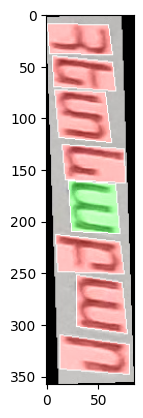

5 0
5 1
5 2
5 3
5 4
5 6
5 7


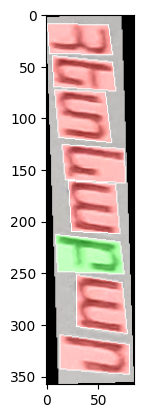

6 0
6 1
6 2
6 3
6 4
6 5
6 7


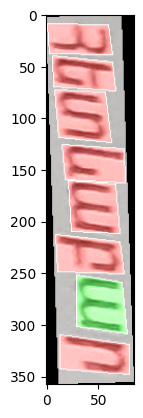

7 0
7 1
7 2
7 3
7 4
7 5
7 6


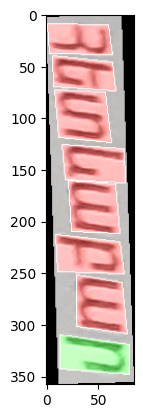

0 1
0 2
0 3


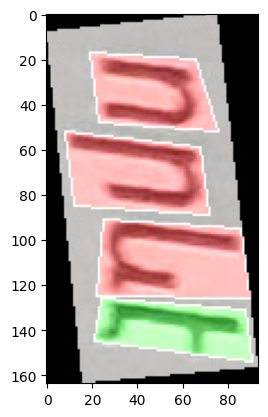

1 0
1 2
1 3


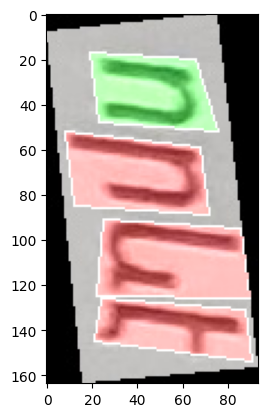

2 0
2 1
2 3


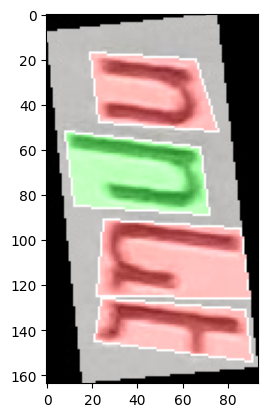

3 0
3 1
3 2


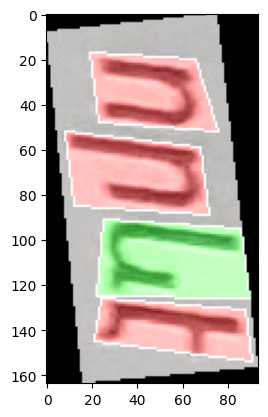

0 1
0 2
0 3
0 4


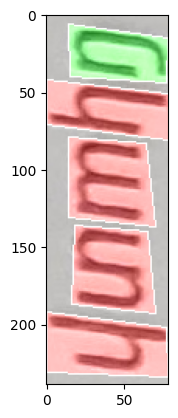

1 0
1 2
1 3
1 4


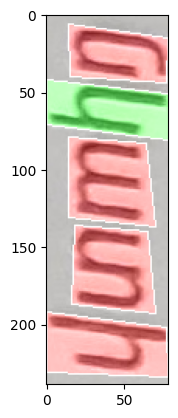

2 0
2 1
2 3
2 4


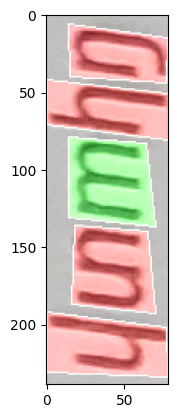

3 0
3 1
3 2
3 4


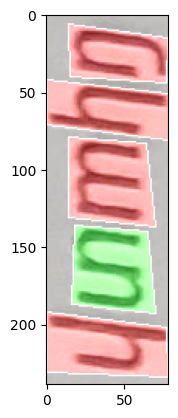

4 0
4 1
4 2
4 3


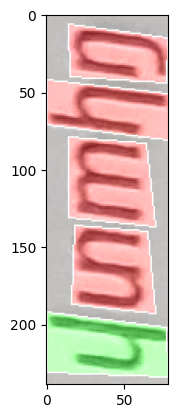

0 1
0 2
0 3
0 4
0 5


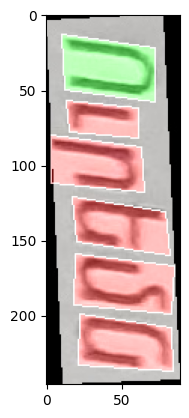

1 0
1 2
1 3
1 4
1 5


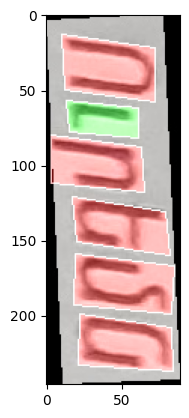

2 0
2 1
2 3
2 4
2 5


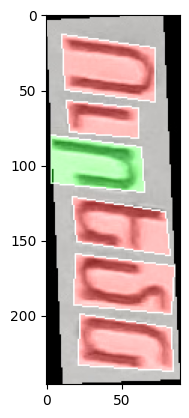

3 0
3 1
3 2
3 4
3 5


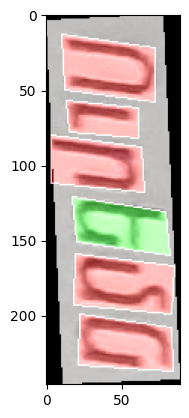

4 0
4 1
4 2
4 3
4 5


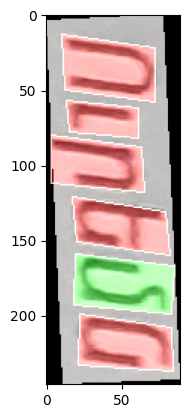

5 0
5 1
5 2
5 3
5 4


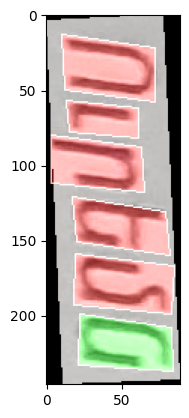

0 1
0 2
0 3
0 4


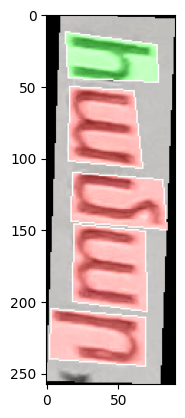

1 0
1 2
1 3
1 4


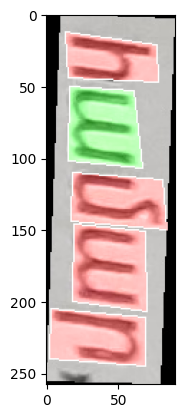

2 0
2 1
2 3
2 4


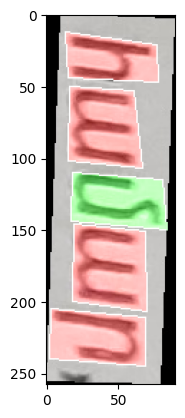

3 0
3 1
3 2
3 4


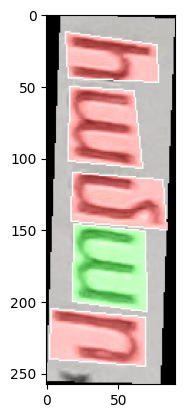

4 0
4 1
4 2
4 3


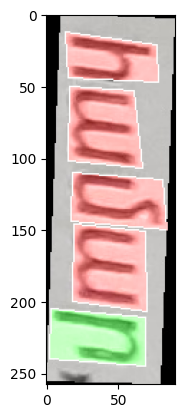

0 1
0 2
0 3
0 4
0 5
0 6
0 7


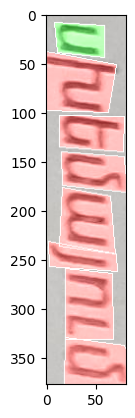

1 0
1 2
1 3
1 4
1 5
1 6
1 7


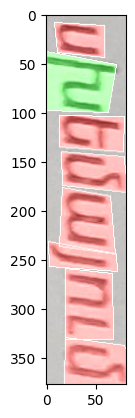

2 0
2 1
2 3
2 4
2 5
2 6
2 7


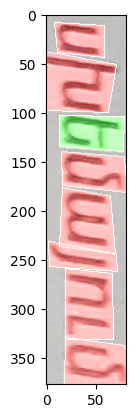

3 0
3 1
3 2
3 4
3 5
3 6
3 7


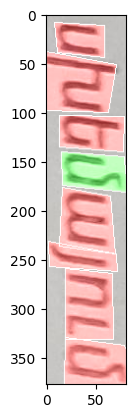

4 0
4 1
4 2
4 3
4 5
4 6
4 7


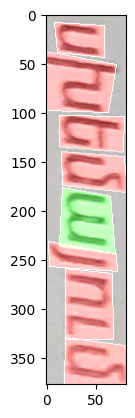

5 0
5 1
5 2
5 3
5 4
5 6
5 7


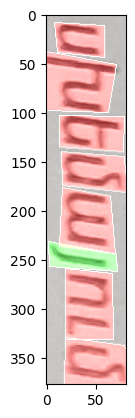

6 0
6 1
6 2
6 3
6 4
6 5
6 7


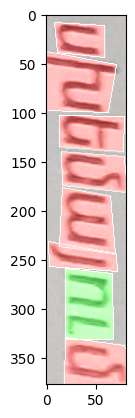

7 0
7 1
7 2
7 3
7 4
7 5
7 6


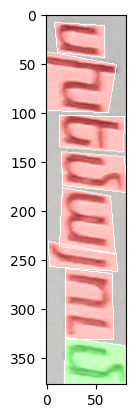

0 1
0 2
0 3
0 4


KeyboardInterrupt: 

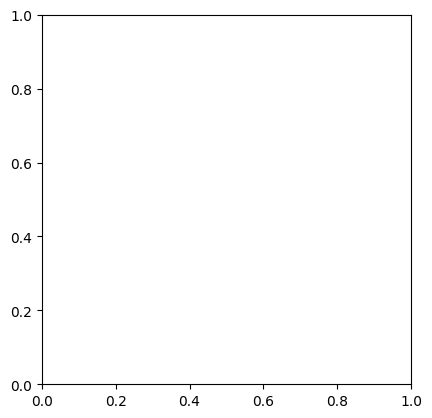

In [29]:
for i in range(20):
    img = plt.imread(image_paths[i])
    polygons = load_yolo_labels(label_paths[i], img.shape)
    for i in range(len(polygons)):
        img_c = draw_polygon(img, polygons[i], fill_color=(0,200,0))
        for j,polygon in enumerate(polygons):
            if j==i:
                continue
            print(i,j)
            img_c = draw_polygon(img_c, polygon)
        plt.imshow(img_c)
        plt.show()


In [72]:
# Generate All classes

In [76]:
chr(45)

'-'

In [4]:
def get_alpabet(cap_st, cap_end, sm_st, sm_end):
    res = []
    for i in range(cap_st, cap_end+1):
        res.append(chr(i))
    for i in range(sm_st, sm_end+1):
        res.append(chr(i))
    
    return res

In [5]:
armenian_aphabet = get_alpabet(ord("Ա"), ord("Ֆ"), ord("ա"), ord("և"))
latin_aphabet = get_alpabet(ord("A"), ord("Z"), ord("a"), ord("z"))
numbers = [str(i) for i in range(10)]
math_symbols = ['(', ')','[', ']','>','/','+','-','*','=','%', '^','&']
special_symbols = ['@','#','$','!', ',', '.', '/', '{', '}' , ';', ':', "'", '"', '|', '_', '`', '~', '՝', '∏', '∑']
other_symbols = ['?']

all_classes = armenian_aphabet + latin_aphabet + numbers + math_symbols + special_symbols + other_symbols

In [6]:
print("8719")

8719


In [8]:
all_classes_dict = {i:all_classes[i] for i in range(len(all_classes))}
import json
with open ("all_classes_v2.json", "w") as f:
    json.dump(all_classes_dict, f)

In [12]:
all_classes_dict_swapped = {all_classes_dict[i]:i for i in all_classes_dict}
with open ("../LetterLabeler/all_classes_v2.json", "w") as f:
    json.dump(all_classes_dict_swapped, f)

In [19]:
[print(f"{i}: '{all_classes_dict[i]}'") for i in all_classes_dict]

0: 'Ա'
1: 'Բ'
2: 'Գ'
3: 'Դ'
4: 'Ե'
5: 'Զ'
6: 'Է'
7: 'Ը'
8: 'Թ'
9: 'Ժ'
10: 'Ի'
11: 'Լ'
12: 'Խ'
13: 'Ծ'
14: 'Կ'
15: 'Հ'
16: 'Ձ'
17: 'Ղ'
18: 'Ճ'
19: 'Մ'
20: 'Յ'
21: 'Ն'
22: 'Շ'
23: 'Ո'
24: 'Չ'
25: 'Պ'
26: 'Ջ'
27: 'Ռ'
28: 'Ս'
29: 'Վ'
30: 'Տ'
31: 'Ր'
32: 'Ց'
33: 'Ւ'
34: 'Փ'
35: 'Ք'
36: 'Օ'
37: 'Ֆ'
38: 'ա'
39: 'բ'
40: 'գ'
41: 'դ'
42: 'ե'
43: 'զ'
44: 'է'
45: 'ը'
46: 'թ'
47: 'ժ'
48: 'ի'
49: 'լ'
50: 'խ'
51: 'ծ'
52: 'կ'
53: 'հ'
54: 'ձ'
55: 'ղ'
56: 'ճ'
57: 'մ'
58: 'յ'
59: 'ն'
60: 'շ'
61: 'ո'
62: 'չ'
63: 'պ'
64: 'ջ'
65: 'ռ'
66: 'ս'
67: 'վ'
68: 'տ'
69: 'ր'
70: 'ց'
71: 'ւ'
72: 'փ'
73: 'ք'
74: 'օ'
75: 'ֆ'
76: 'և'
77: 'A'
78: 'B'
79: 'C'
80: 'D'
81: 'E'
82: 'F'
83: 'G'
84: 'H'
85: 'I'
86: 'J'
87: 'K'
88: 'L'
89: 'M'
90: 'N'
91: 'O'
92: 'P'
93: 'Q'
94: 'R'
95: 'S'
96: 'T'
97: 'U'
98: 'V'
99: 'W'
100: 'X'
101: 'Y'
102: 'Z'
103: 'a'
104: 'b'
105: 'c'
106: 'd'
107: 'e'
108: 'f'
109: 'g'
110: 'h'
111: 'i'
112: 'j'
113: 'k'
114: 'l'
115: 'm'
116: 'n'
117: 'o'
118: 'p'
119: 'q'
120: 'r'
121: 's'
122: 't'
123

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,